In [1]:
%matplotlib inline

import sys
sys.path.append("../../")

from train_model import train

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot, PredictionError

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = '#ffffff'
rcParams['lines.linewidth'] = 2.0

In [2]:
hyperparameter={
"num_nearest":60,
"sigma":10,
"learning_rate":0.008,
"batch_size":250,
"num_neuron":15,
"num_layers":2,
"size_embedded":50,
"num_nearest_geo":30,
"num_nearest_eucli":30,
"id_dataset":'poa',
"epochs":300,
"optimier":'adam',
"validation_split":0.1,
"label":'asi_poa',
"early_stopping": False,
"graph_label":'matrix',
}

# Model

In [3]:
spatial = train(**hyperparameter)

In [4]:
dataset,\
result,\
fit,\
embedded_train,\
embedded_test,\
predict_regression_train,\
predict_regression_test = spatial()

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')
Epoch 1/300
45/45 [==============================] - 1s 11ms/step - loss: 3.1607 - root_mean_squared_error: 4.9592 - val_loss: 0.5663 - val_root_mean_squared_error: 0.7653

Epoch 00001: val_loss improved from inf to 0.56633, saving model to /home/wslkoen/uni/semester3/uc/UC_Project_HPP/output/models/poa/asi_poa_weights.hdf5
Epoch 2/300
45/45 [==============================] - 0s 5ms/step - loss: 0.3852 - root_mean_squared_error: 0.5620 - val_loss: 0.2790 - val_root_mean_squared_error: 0.3761

Epoch 00002: val_loss improved from 0.56633 to 0.27904, saving model to /home/wslkoen/uni/semester3/uc/UC_Project_HPP/output/models/poa/asi_poa_weights.hdf5
Epoch 3/300
45/45 [==============================] - 0s 5ms/step - loss: 0.2460 - root_mean_squared_error: 0.3255 - val_loss: 0.2314 - val_root_mean_squared_error: 0.2952

Epo

In [5]:
print('################# Test ##########################')
print('MALE test:.... {}'.format(result[0]))
print('RMSE test:.... {}'.format(result[1]))
print('MAPE test:.... {}'.format(result[2]))
print('################# Train ##########################')
print('MALE train:.... {}'.format(result[3]))
print('RMSE train:.... {}'.format(result[4]))
print('MAPE train:.... {}'.format(result[5]))

################# Test ##########################
MALE test:.... 0.1393076521315339
RMSE test:.... 93964.35441914083
MAPE test:.... 9.043319694911112
################# Train ##########################
MALE train:.... 0.134359880382414
RMSE train:.... 92670.34844217153
MAPE train:.... 8.38512904575893


# Display Model Training History

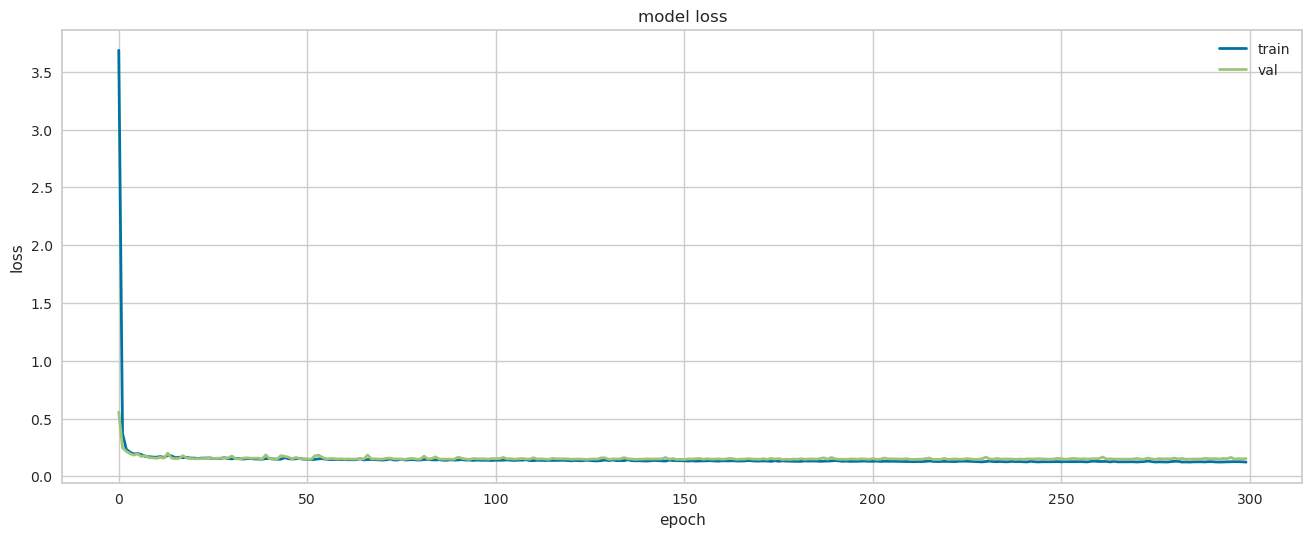

In [60]:
rcParams['figure.figsize'] = (16, 6)
# summarize history for loss
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Residue

## Raw

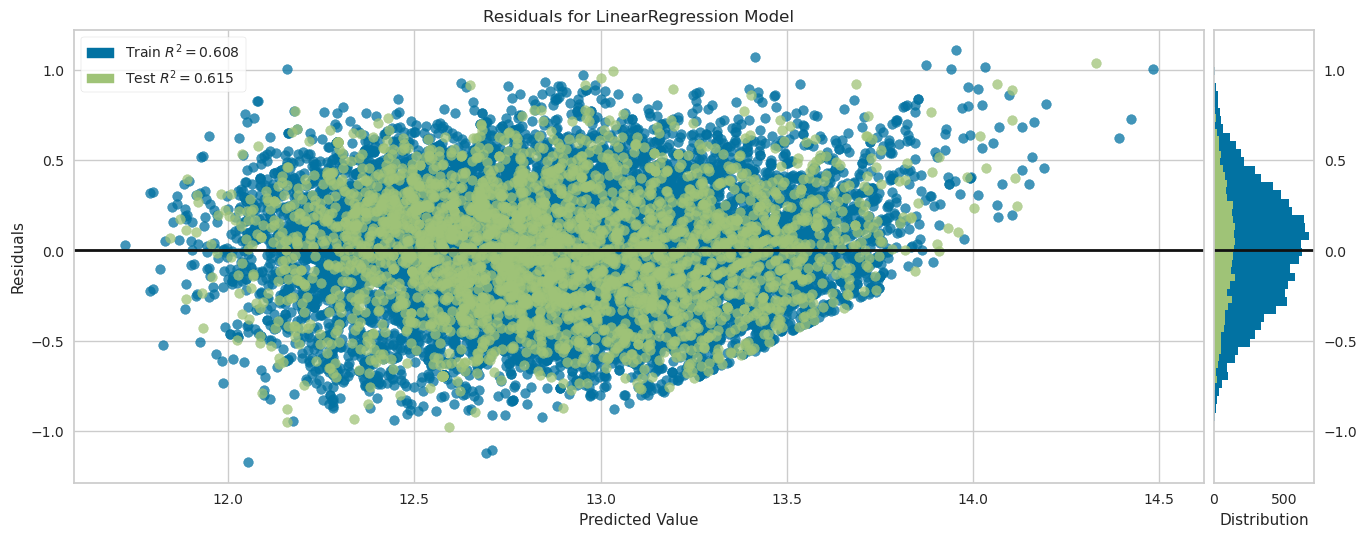

In [61]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the model
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
visualizer.poof();                 # Draw/show/poof the data

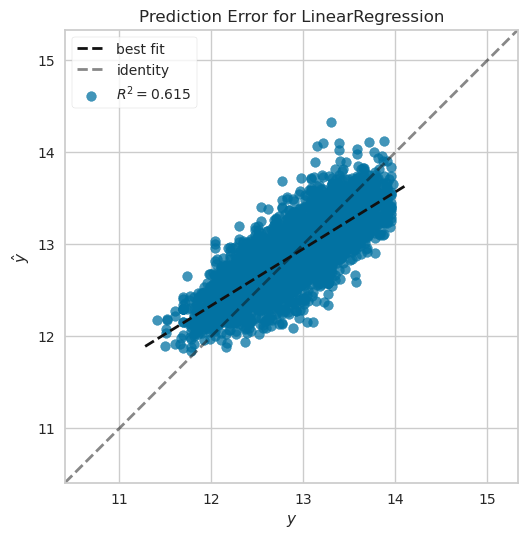

In [62]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression);

visualizer.fit(dataset.X_train, dataset.y_train);  # Fit the training data to the visualizer
visualizer.score(dataset.X_test, dataset.y_test);  # Evaluate the model on the test data
g = visualizer.poof();            # Draw/show/poof the data

## Embedded

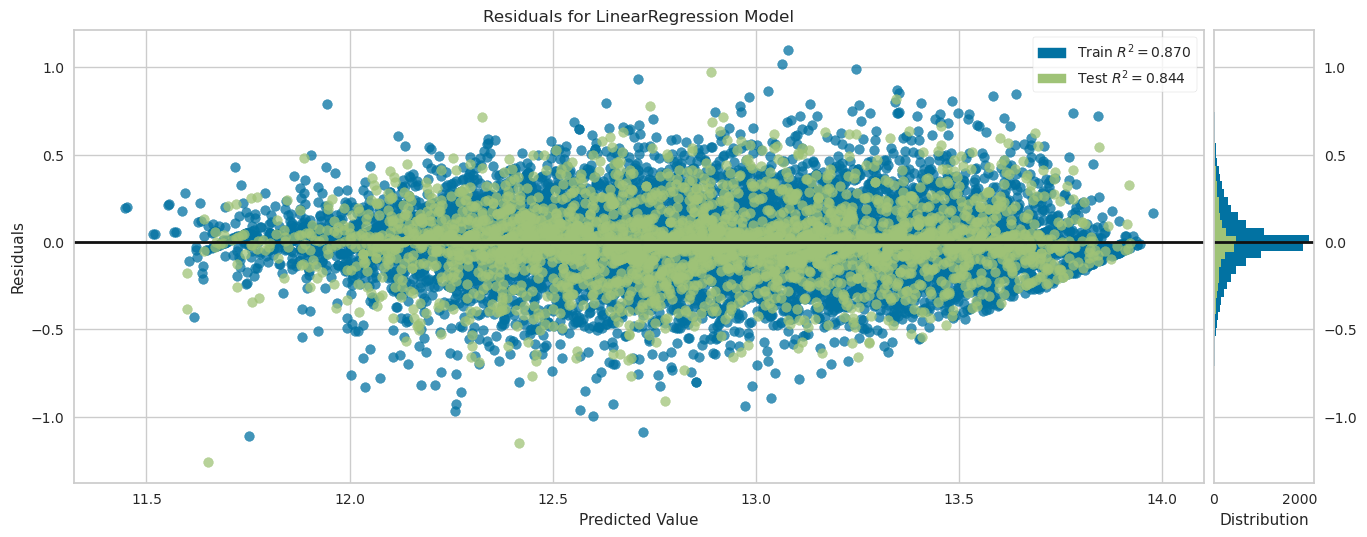

In [63]:
# Instantiate the linear model and visualizer
regressor = LinearRegression()
visualizer = ResidualsPlot(regressor)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the model
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
visualizer.poof();                 # Draw/show/poof the data

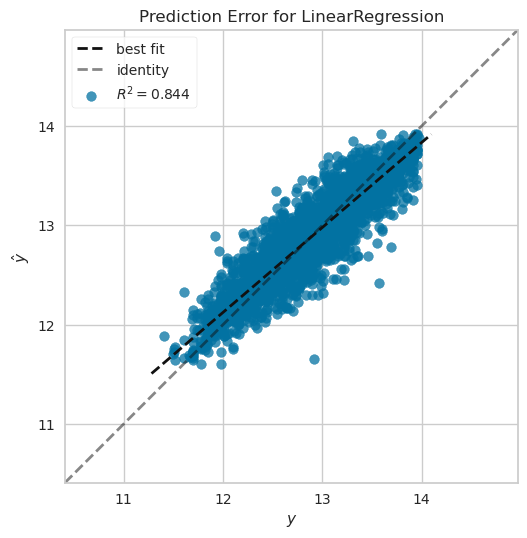

In [64]:
# Instantiate the linear model and visualizer
regression = LinearRegression()
visualizer = PredictionError(regression)

visualizer.fit(embedded_train, dataset.y_train)  # Fit the training data to the visualizer
visualizer.score(embedded_test, dataset.y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data